In [1]:
from IPython.display import HTML, display

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import pandas as pd
import numpy as np

from scipy.stats import norm
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, RidgeCV, LassoCV, ElasticNetCV, ElasticNet, Lasso,  BayesianRidge, LassoLarsIC
from sklearn.metrics import mean_squared_error, make_scorer
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
import xgboost as xgb
import lightgbm as lgb
import os
print(os.listdir("Housing prices/"))


['data_description.txt', 'sample_submission.csv', 'sample_submission.csv.gz', 'test.csv', 'test.csv.gz', 'train.csv', 'train.csv.gz']


In [2]:
path='Housing prices/'

In [3]:
df_train = pd.read_csv(path+'train.csv')

In [4]:
df_train.shape

(1460, 81)

In [5]:
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [6]:
df_train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [7]:
df_test = pd.read_csv(path+'test.csv')

In [8]:
df_test.shape

(1459, 80)

In [9]:
df_test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [10]:
#Sale price analysis

In [11]:
df_train['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

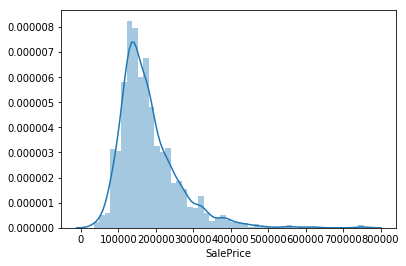

In [12]:
#histogram
sns.distplot(df_train['SalePrice']);

In [13]:
print("Skewness: %f" % df_train['SalePrice'].skew())
print("Kurtosis: %f" % df_train['SalePrice'].kurt())

Skewness: 1.882876
Kurtosis: 6.536282


In [14]:
#Data types

In [15]:
df_train.dtypes


Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
Alley             object
LotShape          object
LandContour       object
Utilities         object
LotConfig         object
LandSlope         object
Neighborhood      object
Condition1        object
Condition2        object
BldgType          object
HouseStyle        object
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
RoofStyle         object
RoofMatl          object
Exterior1st       object
Exterior2nd       object
MasVnrType        object
MasVnrArea       float64
ExterQual         object
ExterCond         object
Foundation        object
                  ...   
BedroomAbvGr       int64
KitchenAbvGr       int64
KitchenQual       object
TotRmsAbvGrd       int64
Functional        object
Fireplaces         int64
FireplaceQu       object
GarageType        object
GarageYrBlt      float64


In [16]:
#check category columns

In [19]:
cat = ['object']
categoricals = df_train.select_dtypes(include=cat)
categoricals.columns.tolist()

['MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType',
 'SaleCondition']

In [20]:
#check numerical columns

In [21]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
numerical_columns = df_train.select_dtypes(include=numerics)
numerical_columns.columns.tolist()

['Id',
 'MSSubClass',
 'LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold',
 'SalePrice']

In [22]:
# Relationship with numerical variables

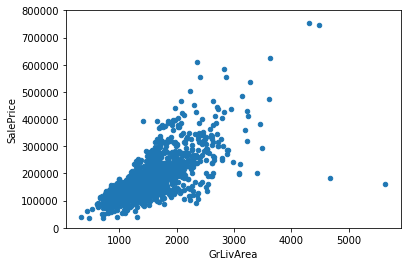

In [23]:
var = 'GrLivArea' #Above grade (ground) living area square feet
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000));

In [24]:
#There is linear relationship

In [25]:
# Delete outliers

In [26]:
df_train = df_train.drop(df_train[(df_train['GrLivArea']>4000) & (df_train['SalePrice']<300000)].index)
df_train = df_train.drop(df_train[(df_train['GrLivArea']>4000) & (df_train['SalePrice']>700000)].index)

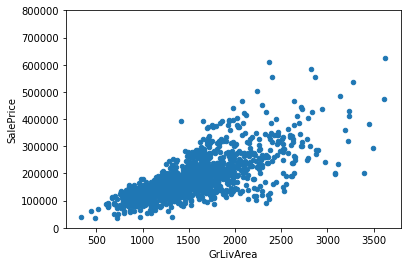

In [27]:
#check
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000));

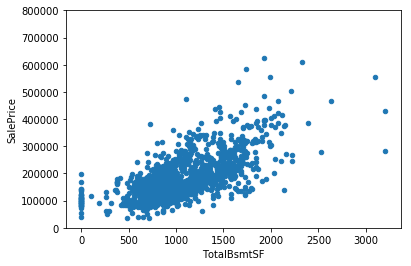

In [28]:
var = 'TotalBsmtSF'  #Total square feet of basement area
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000));

In [29]:
#There is linear relationship

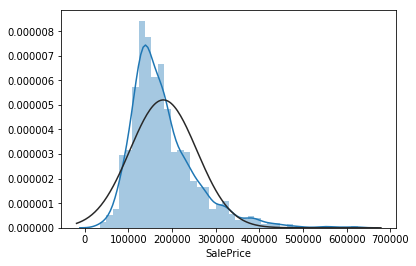

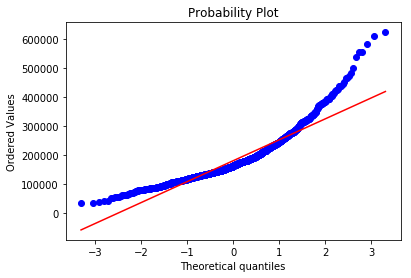

In [30]:
#histogram and normal probability plot
sns.distplot(df_train['SalePrice'], fit=norm);
fig = plt.figure()
res = stats.probplot(df_train['SalePrice'], plot=plt)

In [31]:
# Log transform the target
df_train['SalePrice'] = np.log(df_train['SalePrice'])

In [32]:
y=df_train['SalePrice']
train_y = df_train.SalePrice.values

In [33]:
y

0       12.247694
1       12.109011
2       12.317167
3       11.849398
4       12.429216
5       11.870600
6       12.634603
7       12.206073
8       11.774520
9       11.678440
10      11.771436
11      12.751300
12      11.877569
13      12.540758
14      11.964001
15      11.790557
16      11.911702
17      11.407565
18      11.976659
19      11.842229
20      12.692503
21      11.845103
22      12.345835
23      11.774520
24      11.944708
25      12.454104
26      11.811547
27      12.631340
28      12.242887
29      11.134589
          ...    
1430    12.165980
1431    11.875831
1432    11.074421
1433    12.136187
1434    11.982929
1435    12.066811
1436    11.699405
1437    12.885671
1438    11.916389
1439    12.190959
1440    12.160029
1441    11.913713
1442    12.644328
1443    11.703546
1444    12.098487
1445    11.767568
1446    11.969717
1447    12.388394
1448    11.626254
1449    11.429544
1450    11.820410
1451    12.567551
1452    11.884489
1453    11.344507
1454    12

In [34]:
train_y

array([12.24769432, 12.10901093, 12.31716669, ..., 12.49312952,
       11.86446223, 11.90158345])

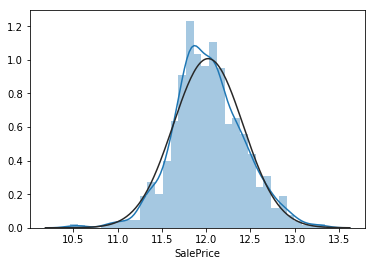

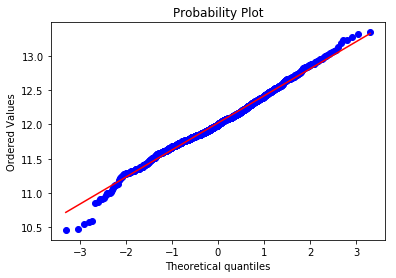

In [35]:
#transformed histogram and normal probability plot
sns.distplot(df_train['SalePrice'], fit=norm);
fig = plt.figure()
res = stats.probplot(df_train['SalePrice'], plot=plt)

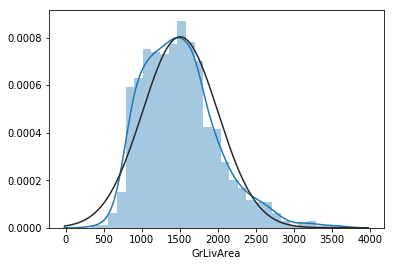

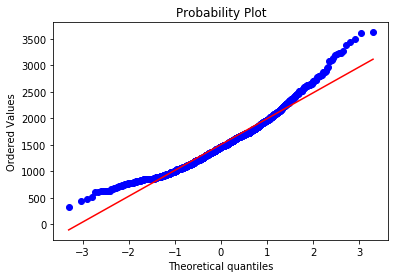

In [36]:
#histogram and normal probability plot
sns.distplot(df_train['GrLivArea'], fit=norm);
fig = plt.figure()
res = stats.probplot(df_train['GrLivArea'], plot=plt)

In [37]:
#log transformation
df_train['GrLivArea'] = np.log(df_train['GrLivArea'])

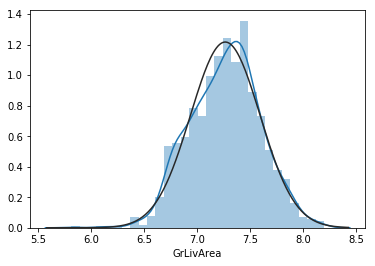

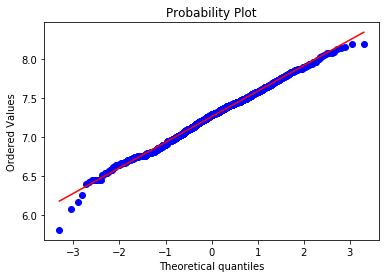

In [38]:
#transformed histogram and normal probability plot
sns.distplot(df_train['GrLivArea'], fit=norm);
fig = plt.figure()
res = stats.probplot(df_train['GrLivArea'], plot=plt)

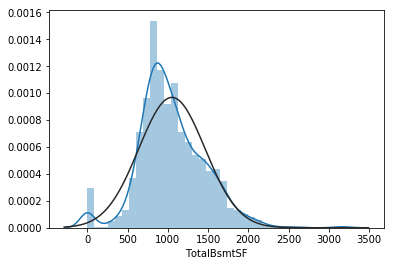

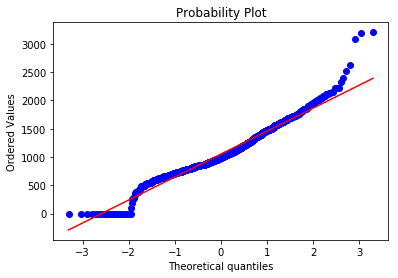

In [39]:
#histogram and normal probability plot
sns.distplot(df_train['TotalBsmtSF'], fit=norm);
fig = plt.figure()
res = stats.probplot(df_train['TotalBsmtSF'], plot=plt)

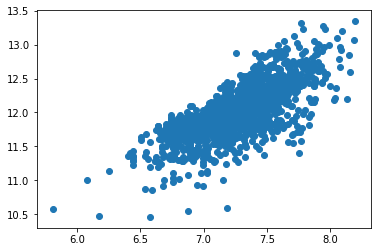

In [40]:
#scatter plot
plt.scatter(df_train['GrLivArea'], df_train['SalePrice']);

In [41]:
# Relationship with categorical features

In [42]:
data=df_train[['OverallQual', 'SalePrice']]

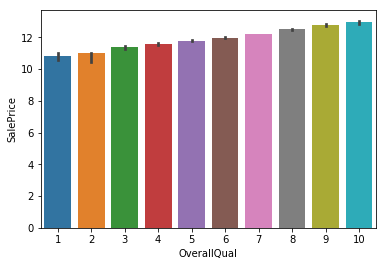

In [43]:
from numpy import median
ax = sns.barplot(x="OverallQual", y="SalePrice", data=data, estimator=median)

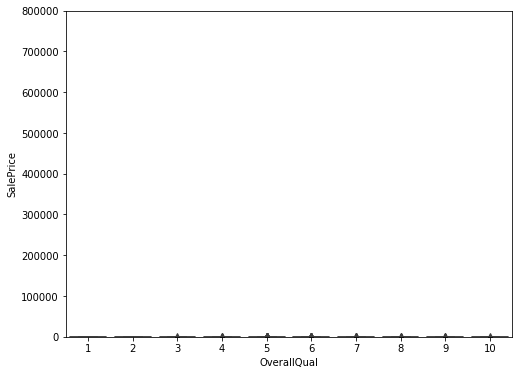

In [44]:
#box plot overallqual/saleprice
var = 'OverallQual'  #Overall material and finish quality
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);

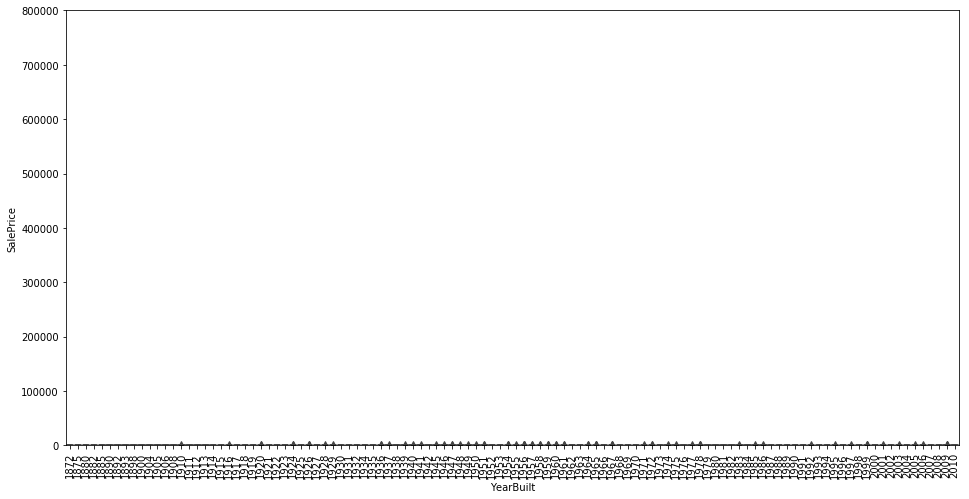

In [45]:
var = 'YearBuilt' #Original construction date
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
f, ax = plt.subplots(figsize=(16, 8))
fig = sns.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);
plt.xticks(rotation=90);

In [46]:
# Correlation matrix (heatmap style)

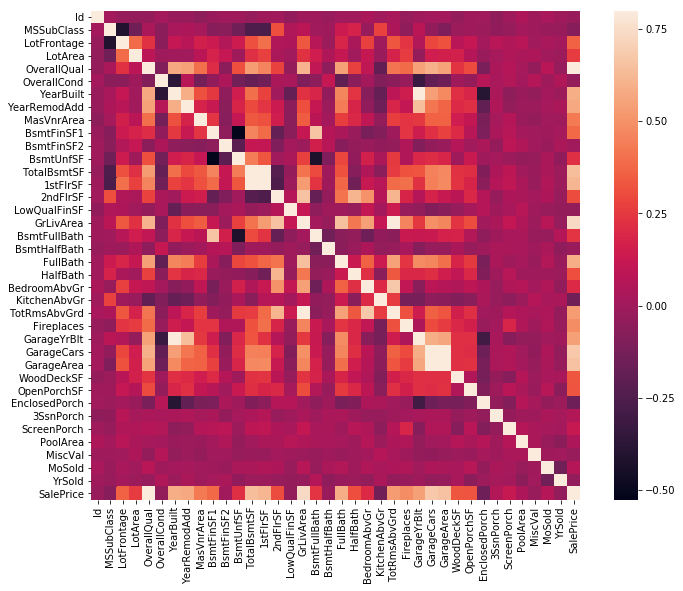

In [47]:
corrmat = df_train.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

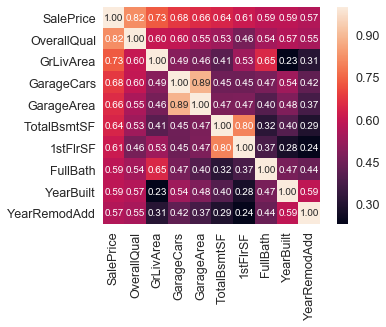

In [48]:
#saleprice correlation matrix
k = 10 #number of variables for heatmap
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(df_train[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

In [49]:

#'OverallQual', 'GrLivArea' and 'TotalBsmtSF' are strongly correlated with 'SalePrice'. Check!
#'GarageCars' and 'GarageArea' are also some of the most strongly correlated variables. However, as we discussed in the last sub-point, the number of cars that fit into the garage is a consequence of the garage area. 'GarageCars' and 'GarageArea' are like twin brothers. You'll never be able to distinguish them. Therefore, we just need one of these variables in our analysis (we can keep 'GarageCars' since its correlation with 'SalePrice' is higher).
#'TotalBsmtSF' and '1stFloor' also seem to be twin brothers. We can keep 'TotalBsmtSF' just to say that our first guess was right (re-read 'So... What can we expect?'). 
#'TotRmsAbvGrd' and 'GrLivArea', twin brothers again. 


In [50]:
# Find most important features relative to target
print("Find most important features relative to target")
corr = df_train.corr()
corr.sort_values(["SalePrice"], ascending = False, inplace = True)
print(corr.SalePrice)

Find most important features relative to target
SalePrice        1.000000
OverallQual      0.819240
GrLivArea        0.732805
GarageCars       0.680408
GarageArea       0.655211
TotalBsmtSF      0.641553
1stFlrSF         0.613742
FullBath         0.590919
YearBuilt        0.588977
YearRemodAdd     0.568986
GarageYrBlt      0.544005
TotRmsAbvGrd     0.533446
Fireplaces       0.487126
MasVnrArea       0.430073
BsmtFinSF1       0.382710
LotFrontage      0.363285
WoodDeckSF       0.330573
OpenPorchSF      0.327038
HalfBath         0.311191
2ndFlrSF         0.306605
LotArea          0.258945
BsmtFullBath     0.238851
BsmtUnfSF        0.223248
BedroomAbvGr     0.204117
ScreenPorch      0.123860
MoSold           0.062231
3SsnPorch        0.056065
PoolArea         0.040679
BsmtFinSF2       0.006420
BsmtHalfBath    -0.014974
MiscVal         -0.019752
Id              -0.020511
YrSold          -0.034319
OverallCond     -0.036843
LowQualFinSF    -0.037698
MSSubClass      -0.075083
KitchenAbvGr    

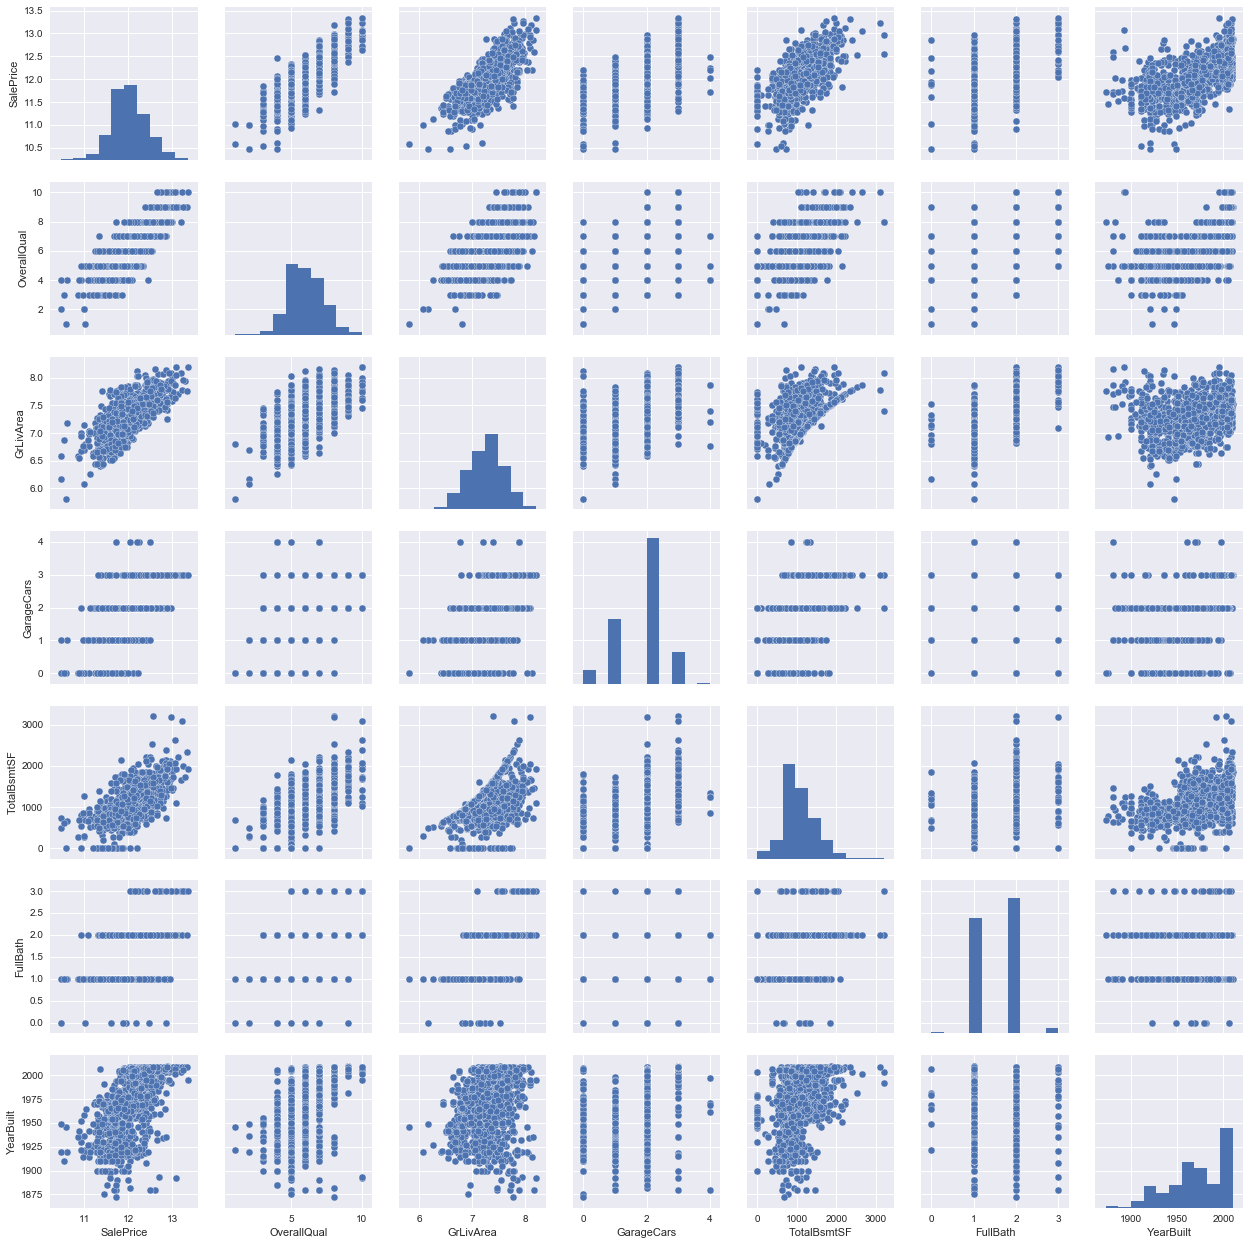

In [51]:
#scatterplot
sns.set()
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']
sns.pairplot(df_train[cols], size = 2.5)
plt.show();

In [52]:
# Check for duplicates

In [53]:
idsUnique = len(set(df_train.Id))
idsTotal = df_train.shape[0]
idsDupli = idsTotal - idsUnique
print("There are " + str(idsDupli) + " duplicate IDs for " + str(idsTotal) + " total entries")

There are 0 duplicate IDs for 1456 total entries


In [54]:
# Drop Id column
#df_train.drop("Id", axis = 1, inplace = True)

In [55]:
#convert categorical variable into dummy
#df_train = pd.get_dummies(df_train)

In [56]:
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,12.247694
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,12.109011
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,12.317167
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,11.849398
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,12.429216


In [57]:
# Handle missing values for features where median/mean or most common value doesn't make sense

# Alley : data description says NA means "no alley access"
df_train.loc[:, "Alley"] = df_train.loc[:, "Alley"].fillna("None")
# BedroomAbvGr : NA most likely means 0
df_train.loc[:, "BedroomAbvGr"] = df_train.loc[:, "BedroomAbvGr"].fillna(0)
# BsmtQual etc : data description says NA for basement features is "no basement"
df_train.loc[:, "BsmtQual"] = df_train.loc[:, "BsmtQual"].fillna("No")
df_train.loc[:, "BsmtCond"] = df_train.loc[:, "BsmtCond"].fillna("No")
df_train.loc[:, "BsmtExposure"] = df_train.loc[:, "BsmtExposure"].fillna("No")
df_train.loc[:, "BsmtFinType1"] = df_train.loc[:, "BsmtFinType1"].fillna("No")
df_train.loc[:, "BsmtFinType2"] = df_train.loc[:, "BsmtFinType2"].fillna("No")
df_train.loc[:, "BsmtFullBath"] = df_train.loc[:, "BsmtFullBath"].fillna(0)
df_train.loc[:, "BsmtHalfBath"] = df_train.loc[:, "BsmtHalfBath"].fillna(0)
df_train.loc[:, "BsmtUnfSF"] = df_train.loc[:, "BsmtUnfSF"].fillna(0)
# CentralAir : NA most likely means No
df_train.loc[:, "CentralAir"] = df_train.loc[:, "CentralAir"].fillna("N")
# Condition : NA most likely means Normal
df_train.loc[:, "Condition1"] = df_train.loc[:, "Condition1"].fillna("Norm")
df_train.loc[:, "Condition2"] = df_train.loc[:, "Condition2"].fillna("Norm")
# EnclosedPorch : NA most likely means no enclosed porch
df_train.loc[:, "EnclosedPorch"] = df_train.loc[:, "EnclosedPorch"].fillna(0)
# External stuff : NA most likely means average
df_train.loc[:, "ExterCond"] = df_train.loc[:, "ExterCond"].fillna("TA")
df_train.loc[:, "ExterQual"] = df_train.loc[:, "ExterQual"].fillna("TA")
# Fence : data description says NA means "no fence"
df_train.loc[:, "Fence"] = df_train.loc[:, "Fence"].fillna("No")
# FireplaceQu : data description says NA means "no fireplace"
df_train.loc[:, "FireplaceQu"] = df_train.loc[:, "FireplaceQu"].fillna("No")
df_train.loc[:, "Fireplaces"] = df_train.loc[:, "Fireplaces"].fillna(0)
# Functional : data description says NA means typical
df_train.loc[:, "Functional"] = df_train.loc[:, "Functional"].fillna("Typ")
# GarageType etc : data description says NA for garage features is "no garage"
df_train.loc[:, "GarageType"] = df_train.loc[:, "GarageType"].fillna("No")
df_train.loc[:, "GarageFinish"] = df_train.loc[:, "GarageFinish"].fillna("No")
df_train.loc[:, "GarageQual"] = df_train.loc[:, "GarageQual"].fillna("No")
df_train.loc[:, "GarageCond"] = df_train.loc[:, "GarageCond"].fillna("No")
df_train.loc[:, "GarageArea"] = df_train.loc[:, "GarageArea"].fillna(0)
df_train.loc[:, "GarageCars"] = df_train.loc[:, "GarageCars"].fillna(0)
df_train.loc[:, "GarageYrBlt"] = df_train.loc[:, "GarageYrBlt"].fillna(0)
# HalfBath : NA most likely means no half baths above grade
df_train.loc[:, "HalfBath"] = df_train.loc[:, "HalfBath"].fillna(0)
# HeatingQC : NA most likely means typical
df_train.loc[:, "HeatingQC"] = df_train.loc[:, "HeatingQC"].fillna("TA")
# KitchenAbvGr : NA most likely means 0
df_train.loc[:, "KitchenAbvGr"] = df_train.loc[:, "KitchenAbvGr"].fillna(0)
# KitchenQual : NA most likely means typical
df_train.loc[:, "KitchenQual"] = df_train.loc[:, "KitchenQual"].fillna("TA")
# LotFrontage : NA most likely means no lot frontage
df_train.loc[:, "LotFrontage"] = df_train.loc[:, "LotFrontage"].fillna(0)
# LotShape : NA most likely means regular
df_train.loc[:, "LotShape"] = df_train.loc[:, "LotShape"].fillna("Reg")
# MasVnrType : NA most likely means no veneer
df_train.loc[:, "MasVnrType"] = df_train.loc[:, "MasVnrType"].fillna("None")
df_train.loc[:, "MasVnrArea"] = df_train.loc[:, "MasVnrArea"].fillna(0)
# MiscFeature : data description says NA means "no misc feature"
df_train.loc[:, "MiscFeature"] = df_train.loc[:, "MiscFeature"].fillna("No")
df_train.loc[:, "MiscVal"] = df_train.loc[:, "MiscVal"].fillna(0)
# OpenPorchSF : NA most likely means no open porch
df_train.loc[:, "OpenPorchSF"] = df_train.loc[:, "OpenPorchSF"].fillna(0)
# PavedDrive : NA most likely means not paved
df_train.loc[:, "PavedDrive"] = df_train.loc[:, "PavedDrive"].fillna("N")
# PoolQC : data description says NA means "no pool"
df_train.loc[:, "PoolQC"] = df_train.loc[:, "PoolQC"].fillna("No")
df_train.loc[:, "PoolArea"] = df_train.loc[:, "PoolArea"].fillna(0)
# SaleCondition : NA most likely means normal sale
df_train.loc[:, "SaleCondition"] = df_train.loc[:, "SaleCondition"].fillna("Normal")
# ScreenPorch : NA most likely means no screen porch
df_train.loc[:, "ScreenPorch"] = df_train.loc[:, "ScreenPorch"].fillna(0)
# TotRmsAbvGrd : NA most likely means 0
df_train.loc[:, "TotRmsAbvGrd"] = df_train.loc[:, "TotRmsAbvGrd"].fillna(0)
# Utilities : NA most likely means all public utilities
df_train.loc[:, "Utilities"] = df_train.loc[:, "Utilities"].fillna("AllPub")
# WoodDeckSF : NA most likely means no wood deck
df_train.loc[:, "WoodDeckSF"] = df_train.loc[:, "WoodDeckSF"].fillna(0)

In [58]:
'''
# Encode some categorical features as ordered numbers when there is information in the order
train = train.replace({"Alley" : {"Grvl" : 1, "Pave" : 2},
                       "BsmtCond" : {"No" : 0, "Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                       "BsmtExposure" : {"No" : 0, "Mn" : 1, "Av": 2, "Gd" : 3},
                       "BsmtFinType1" : {"No" : 0, "Unf" : 1, "LwQ": 2, "Rec" : 3, "BLQ" : 4, 
                                         "ALQ" : 5, "GLQ" : 6},
                       "BsmtFinType2" : {"No" : 0, "Unf" : 1, "LwQ": 2, "Rec" : 3, "BLQ" : 4, 
                                         "ALQ" : 5, "GLQ" : 6},
                       "BsmtQual" : {"No" : 0, "Po" : 1, "Fa" : 2, "TA": 3, "Gd" : 4, "Ex" : 5},
                       "ExterCond" : {"Po" : 1, "Fa" : 2, "TA": 3, "Gd": 4, "Ex" : 5},
                       "ExterQual" : {"Po" : 1, "Fa" : 2, "TA": 3, "Gd": 4, "Ex" : 5},
                       "FireplaceQu" : {"No" : 0, "Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                       "Functional" : {"Sal" : 1, "Sev" : 2, "Maj2" : 3, "Maj1" : 4, "Mod": 5, 
                                       "Min2" : 6, "Min1" : 7, "Typ" : 8},
                       "GarageCond" : {"No" : 0, "Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                       "GarageQual" : {"No" : 0, "Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                       "HeatingQC" : {"Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                       "KitchenQual" : {"Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                       "LandSlope" : {"Sev" : 1, "Mod" : 2, "Gtl" : 3},
                       "LotShape" : {"IR3" : 1, "IR2" : 2, "IR1" : 3, "Reg" : 4},
                       "PavedDrive" : {"N" : 0, "P" : 1, "Y" : 2},
                       "PoolQC" : {"No" : 0, "Fa" : 1, "TA" : 2, "Gd" : 3, "Ex" : 4},
                       "Street" : {"Grvl" : 1, "Pave" : 2},
                       "Utilities" : {"ELO" : 1, "NoSeWa" : 2, "NoSewr" : 3, "AllPub" : 4}}
                     )'''

'\n# Encode some categorical features as ordered numbers when there is information in the order\ntrain = train.replace({"Alley" : {"Grvl" : 1, "Pave" : 2},\n                       "BsmtCond" : {"No" : 0, "Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},\n                       "BsmtExposure" : {"No" : 0, "Mn" : 1, "Av": 2, "Gd" : 3},\n                       "BsmtFinType1" : {"No" : 0, "Unf" : 1, "LwQ": 2, "Rec" : 3, "BLQ" : 4, \n                                         "ALQ" : 5, "GLQ" : 6},\n                       "BsmtFinType2" : {"No" : 0, "Unf" : 1, "LwQ": 2, "Rec" : 3, "BLQ" : 4, \n                                         "ALQ" : 5, "GLQ" : 6},\n                       "BsmtQual" : {"No" : 0, "Po" : 1, "Fa" : 2, "TA": 3, "Gd" : 4, "Ex" : 5},\n                       "ExterCond" : {"Po" : 1, "Fa" : 2, "TA": 3, "Gd": 4, "Ex" : 5},\n                       "ExterQual" : {"Po" : 1, "Fa" : 2, "TA": 3, "Gd": 4, "Ex" : 5},\n                       "FireplaceQu" : {"No" : 0, "Po" : 1, "Fa" :

In [59]:
'''# Create new features
# 1* Simplifications of existing features
train["SimplOverallQual"] = train.OverallQual.replace({1 : 1, 2 : 1, 3 : 1, # bad
                                                       4 : 2, 5 : 2, 6 : 2, # average
                                                       7 : 3, 8 : 3, 9 : 3, 10 : 3 # good
                                                      })
train["SimplOverallCond"] = train.OverallCond.replace({1 : 1, 2 : 1, 3 : 1, # bad
                                                       4 : 2, 5 : 2, 6 : 2, # average
                                                       7 : 3, 8 : 3, 9 : 3, 10 : 3 # good
                                                      })
train["SimplPoolQC"] = train.PoolQC.replace({1 : 1, 2 : 1, # average
                                             3 : 2, 4 : 2 # good
                                            })
train["SimplGarageCond"] = train.GarageCond.replace({1 : 1, # bad
                                                     2 : 1, 3 : 1, # average
                                                     4 : 2, 5 : 2 # good
                                                    })
train["SimplGarageQual"] = train.GarageQual.replace({1 : 1, # bad
                                                     2 : 1, 3 : 1, # average
                                                     4 : 2, 5 : 2 # good
                                                    })
train["SimplFireplaceQu"] = train.FireplaceQu.replace({1 : 1, # bad
                                                       2 : 1, 3 : 1, # average
                                                       4 : 2, 5 : 2 # good
                                                      })
train["SimplFireplaceQu"] = train.FireplaceQu.replace({1 : 1, # bad
                                                       2 : 1, 3 : 1, # average
                                                       4 : 2, 5 : 2 # good
                                                      })
train["SimplFunctional"] = train.Functional.replace({1 : 1, 2 : 1, # bad
                                                     3 : 2, 4 : 2, # major
                                                     5 : 3, 6 : 3, 7 : 3, # minor
                                                     8 : 4 # typical
                                                    })
train["SimplKitchenQual"] = train.KitchenQual.replace({1 : 1, # bad
                                                       2 : 1, 3 : 1, # average
                                                       4 : 2, 5 : 2 # good
                                                      })
train["SimplHeatingQC"] = train.HeatingQC.replace({1 : 1, # bad
                                                   2 : 1, 3 : 1, # average
                                                   4 : 2, 5 : 2 # good
                                                  })
train["SimplBsmtFinType1"] = train.BsmtFinType1.replace({1 : 1, # unfinished
                                                         2 : 1, 3 : 1, # rec room
                                                         4 : 2, 5 : 2, 6 : 2 # living quarters
                                                        })
train["SimplBsmtFinType2"] = train.BsmtFinType2.replace({1 : 1, # unfinished
                                                         2 : 1, 3 : 1, # rec room
                                                         4 : 2, 5 : 2, 6 : 2 # living quarters
                                                        })
train["SimplBsmtCond"] = train.BsmtCond.replace({1 : 1, # bad
                                                 2 : 1, 3 : 1, # average
                                                 4 : 2, 5 : 2 # good
                                                })
train["SimplBsmtQual"] = train.BsmtQual.replace({1 : 1, # bad
                                                 2 : 1, 3 : 1, # average
                                                 4 : 2, 5 : 2 # good
                                                })
train["SimplExterCond"] = train.ExterCond.replace({1 : 1, # bad
                                                   2 : 1, 3 : 1, # average
                                                   4 : 2, 5 : 2 # good
                                                  })
train["SimplExterQual"] = train.ExterQual.replace({1 : 1, # bad
                                                   2 : 1, 3 : 1, # average
                                                   4 : 2, 5 : 2 # good
                                                  })

# 2* Combinations of existing features
# Overall quality of the house
train["OverallGrade"] = train["OverallQual"] * train["OverallCond"]
# Overall quality of the garage
train["GarageGrade"] = train["GarageQual"] * train["GarageCond"]
# Overall quality of the exterior
train["ExterGrade"] = train["ExterQual"] * train["ExterCond"]
# Overall kitchen score
train["KitchenScore"] = train["KitchenAbvGr"] * train["KitchenQual"]
# Overall fireplace score
train["FireplaceScore"] = train["Fireplaces"] * train["FireplaceQu"]
# Overall garage score
train["GarageScore"] = train["GarageArea"] * train["GarageQual"]
# Overall pool score
train["PoolScore"] = train["PoolArea"] * train["PoolQC"]
# Simplified overall quality of the house
train["SimplOverallGrade"] = train["SimplOverallQual"] * train["SimplOverallCond"]
# Simplified overall quality of the exterior
train["SimplExterGrade"] = train["SimplExterQual"] * train["SimplExterCond"]
# Simplified overall pool score
train["SimplPoolScore"] = train["PoolArea"] * train["SimplPoolQC"]
# Simplified overall garage score
train["SimplGarageScore"] = train["GarageArea"] * train["SimplGarageQual"]
# Simplified overall fireplace score
train["SimplFireplaceScore"] = train["Fireplaces"] * train["SimplFireplaceQu"]
# Simplified overall kitchen score
train["SimplKitchenScore"] = train["KitchenAbvGr"] * train["SimplKitchenQual"]
# Total number of bathrooms
train["TotalBath"] = train["BsmtFullBath"] + (0.5 * train["BsmtHalfBath"]) + \
train["FullBath"] + (0.5 * train["HalfBath"])
# Total SF for house (incl. basement)
train["AllSF"] = train["GrLivArea"] + train["TotalBsmtSF"]
# Total SF for 1st + 2nd floors
train["AllFlrsSF"] = train["1stFlrSF"] + train["2ndFlrSF"]
# Total SF for porch
train["AllPorchSF"] = train["OpenPorchSF"] + train["EnclosedPorch"] + \
train["3SsnPorch"] + train["ScreenPorch"]
# Has masonry veneer or not
train["HasMasVnr"] = train.MasVnrType.replace({"BrkCmn" : 1, "BrkFace" : 1, "CBlock" : 1, 
                                               "Stone" : 1, "None" : 0})
# House completed before sale or not
train["BoughtOffPlan"] = train.SaleCondition.replace({"Abnorml" : 0, "Alloca" : 0, "AdjLand" : 0, 
                                                      "Family" : 0, "Normal" : 0, "Partial" : 1})'''

'# Create new features\n# 1* Simplifications of existing features\ntrain["SimplOverallQual"] = train.OverallQual.replace({1 : 1, 2 : 1, 3 : 1, # bad\n                                                       4 : 2, 5 : 2, 6 : 2, # average\n                                                       7 : 3, 8 : 3, 9 : 3, 10 : 3 # good\n                                                      })\ntrain["SimplOverallCond"] = train.OverallCond.replace({1 : 1, 2 : 1, 3 : 1, # bad\n                                                       4 : 2, 5 : 2, 6 : 2, # average\n                                                       7 : 3, 8 : 3, 9 : 3, 10 : 3 # good\n                                                      })\ntrain["SimplPoolQC"] = train.PoolQC.replace({1 : 1, 2 : 1, # average\n                                             3 : 2, 4 : 2 # good\n                                            })\ntrain["SimplGarageCond"] = train.GarageCond.replace({1 : 1, # bad\n                                            

In [60]:
# Create new features
# 3* Polynomials on the top existing features

df_train["OverallQual-s2"] = df_train["OverallQual"] ** 2
df_train["OverallQual-s3"] = df_train["OverallQual"] ** 3
df_train["OverallQual-Sq"] = np.sqrt(df_train["OverallQual"])
df_train["GrLivArea-2"] = df_train["GrLivArea"] ** 2
df_train["GrLivArea-3"] = df_train["GrLivArea"] ** 3
df_train["GrLivArea-Sq"] = np.sqrt(df_train["GrLivArea"])
df_train["GarageCars-2"] = df_train["GarageCars"] ** 2
df_train["GarageCars-3"] = df_train["GarageCars"] ** 3
df_train["GarageCars-Sq"] = np.sqrt(df_train["GarageCars"])
df_train["TotalBsmtSF-2"] = df_train["TotalBsmtSF"] ** 2
df_train["TotalBsmtSF-3"] = df_train["TotalBsmtSF"] ** 3
df_train["TotalBsmtSF-Sq"] = np.sqrt(df_train["TotalBsmtSF"])
df_train["1stFlrSF-2"] = df_train["1stFlrSF"] ** 2
df_train["1stFlrSF-3"] = df_train["1stFlrSF"] ** 3
df_train["1stFlrSF-Sq"] = np.sqrt(df_train["1stFlrSF"])
df_train["FullBath-2"] = df_train["FullBath"] ** 2
df_train["FullBath-Sq"] = np.sqrt(df_train["FullBath"])

In [61]:
'''
# Some numerical features are actually really categories
train = train.replace({"MSSubClass" : {20 : "SC20", 30 : "SC30", 40 : "SC40", 45 : "SC45", 
                                       50 : "SC50", 60 : "SC60", 70 : "SC70", 75 : "SC75", 
                                       80 : "SC80", 85 : "SC85", 90 : "SC90", 120 : "SC120", 
                                       150 : "SC150", 160 : "SC160", 180 : "SC180", 190 : "SC190"},
                       "MoSold" : {1 : "Jan", 2 : "Feb", 3 : "Mar", 4 : "Apr", 5 : "May", 6 : "Jun",
                                   7 : "Jul", 8 : "Aug", 9 : "Sep", 10 : "Oct", 11 : "Nov", 12 : "Dec"}
                      })'''

'\n# Some numerical features are actually really categories\ntrain = train.replace({"MSSubClass" : {20 : "SC20", 30 : "SC30", 40 : "SC40", 45 : "SC45", \n                                       50 : "SC50", 60 : "SC60", 70 : "SC70", 75 : "SC75", \n                                       80 : "SC80", 85 : "SC85", 90 : "SC90", 120 : "SC120", \n                                       150 : "SC150", 160 : "SC160", 180 : "SC180", 190 : "SC190"},\n                       "MoSold" : {1 : "Jan", 2 : "Feb", 3 : "Mar", 4 : "Apr", 5 : "May", 6 : "Jun",\n                                   7 : "Jul", 8 : "Aug", 9 : "Sep", 10 : "Oct", 11 : "Nov", 12 : "Dec"}\n                      })'

In [62]:
'''
# Handle remaining missing values for numerical features by using median as replacement
print("NAs for numerical features in train : " + str(train_num.isnull().values.sum()))
train_num = train_num.fillna(train_num.median())
print("Remaining NAs for numerical features in train : " + str(train_num.isnull().values.sum()))

SyntaxError: EOF while scanning triple-quoted string literal (<ipython-input-62-2c97895fc0ee>, line 5)

In [63]:
#handling missing value 

null_columns=df_train.columns[df_train.isnull().any()]
df_train[null_columns].isnull().sum()

Electrical    1
dtype: int64

In [64]:
df_train['Electrical'].values

array(['SBrkr', 'SBrkr', 'SBrkr', ..., 'SBrkr', 'FuseA', 'SBrkr'],
      dtype=object)

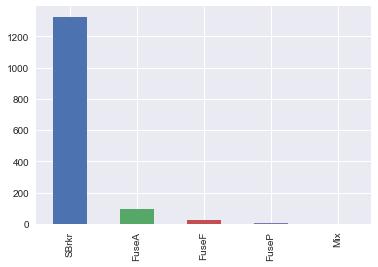

In [65]:
a = df_train['Electrical'].values
df_train["Electrical"] = pd.DataFrame(a, columns= ["Electrical"])

df_train["Electrical"].value_counts().plot.bar()

plt.show()

In [66]:
df_train.loc[:, "Electrical"] = df_train.loc[:, "Electrical"].fillna("SBrkr")

In [67]:
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,GarageCars-3,GarageCars-Sq,TotalBsmtSF-2,TotalBsmtSF-3,TotalBsmtSF-Sq,1stFlrSF-2,1stFlrSF-3,1stFlrSF-Sq,FullBath-2,FullBath-Sq
0,1,60,RL,65.0,8450,Pave,None,Reg,Lvl,AllPub,...,8,1.414214,732736,627222016,29.257478,732736,627222016,29.257478,4,1.414214
1,2,20,RL,80.0,9600,Pave,None,Reg,Lvl,AllPub,...,8,1.414214,1592644,2009916728,35.524639,1592644,2009916728,35.524639,4,1.414214
2,3,60,RL,68.0,11250,Pave,None,IR1,Lvl,AllPub,...,8,1.414214,846400,778688000,30.331502,846400,778688000,30.331502,4,1.414214
3,4,70,RL,60.0,9550,Pave,None,IR1,Lvl,AllPub,...,27,1.732051,571536,432081216,27.495454,923521,887503681,31.000000,1,1.000000
4,5,60,RL,84.0,14260,Pave,None,IR1,Lvl,AllPub,...,27,1.732051,1311025,1501123625,33.837849,1311025,1501123625,33.837849,4,1.414214


In [68]:
# New numerical features (minus the target) and categorical features
categorical_features = df_train.select_dtypes(include = ["object"]).columns
numerical_features = df_train.select_dtypes(exclude = ["object"]).columns

print("Numerical features : " + str(len(numerical_features)))
print("Categorical features : " + str(len(categorical_features)))
train_num = df_train[numerical_features]
train_cat = df_train[categorical_features]

Numerical features : 55
Categorical features : 43


In [69]:
# Join categorical and numerical features
train = pd.concat([train_num, train_cat], axis = 1)
print("New number of features : " + str(train.shape[1]))

New number of features : 98


In [70]:
train.shape

(1456, 98)

In [71]:
train_y.shape

(1456,)

In [72]:
y.shape

(1456,)

In [73]:
#ValueError: Found input variables with inconsistent numbers of samples: [1458, 1020]

In [74]:
# Partition the dataset in train + validation sets
X_train, X_test, y_train, y_test = train_test_split(train, y, test_size = 0.3, random_state = 0)
print("X_train : " + str(X_train.shape))
print("X_test : " + str(X_test.shape))
print("y_train : " + str(y_train.shape))
print("y_test : " + str(y_test.shape))

X_train : (1019, 98)
X_test : (437, 98)
y_train : (1019,)
y_test : (437,)


In [75]:
X_train.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
328,329,75,0.0,11888,6,6,1916,1994,0.0,0,...,Detchd,Unf,TA,TA,Y,No,No,No,WD,Normal
1026,1027,20,73.0,9300,5,5,1960,1960,324.0,697,...,Attchd,Unf,TA,TA,Y,No,No,No,WD,Normal
843,844,90,80.0,8000,5,4,1961,1961,0.0,0,...,No,No,No,No,Y,No,No,No,WD,Normal
994,995,20,96.0,12456,10,5,2006,2007,230.0,1172,...,Attchd,Fin,TA,TA,Y,No,No,No,WD,Normal
1226,1227,60,86.0,14598,6,5,2007,2007,74.0,0,...,BuiltIn,Fin,TA,TA,Y,No,No,No,WD,Normal


In [76]:
y_train.head()

328     12.276065
1026    12.028739
843     11.856515
994     12.729321
1226    12.273731
Name: SalePrice, dtype: float64

In [77]:
X_test.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
511,512,120,40.0,6792,7,5,2005,2006,94.0,0,...,Attchd,RFn,TA,TA,Y,No,No,No,New,Partial
963,964,20,122.0,11923,9,5,2007,2007,0.0,0,...,Attchd,Fin,TA,TA,Y,No,No,No,WD,Normal
231,232,60,174.0,15138,8,5,1995,1996,506.0,689,...,Attchd,Fin,TA,TA,Y,No,No,No,WD,Normal
688,689,20,60.0,8089,8,6,2007,2007,0.0,945,...,Attchd,RFn,TA,TA,Y,No,No,No,New,Partial
34,35,120,60.0,7313,9,5,2005,2005,246.0,1153,...,Attchd,Fin,TA,TA,Y,No,No,No,WD,Normal


In [78]:
y_test.head()

511    12.219310
963    12.384219
231    12.906692
688    12.879017
34     12.533576
Name: SalePrice, dtype: float64

In [79]:
#Stacking averaged Models Class
class StackingAveragedModels(BaseEstimator, RegressorMixin, TransformerMixin):
    def __init__(self, base_models, meta_model, n_folds=5):
        self.base_models = base_models
        self.meta_model = meta_model
        self.n_folds = n_folds
   

In [80]:

   
# We again fit the data on clones of the original models
def fit(self, X, y):
    self.base_models_ = [list() for x in self.base_models]
    self.meta_model_ = clone(self.meta_model)
    kfold = KFold(n_splits=self.n_folds, shuffle=True, random_state=156)
        
        # Train cloned base models then create out-of-fold predictions
        # that are needed to train the cloned meta-model
    out_of_fold_predictions = np.zeros((X.shape[0], len(self.base_models)))
    for i, model in enumerate(self.base_models):
        for train_index, holdout_index in kfold.split(X, y):
            instance = clone(model)
            self.base_models_[i].append(instance)
            instance.fit(X[train_index], y[train_index])
            y_pred = instance.predict(X[holdout_index])
            out_of_fold_predictions[holdout_index, i] = y_pred
                
        # Now train the cloned  meta-model using the out-of-fold predictions as new feature
    self.meta_model_.fit(out_of_fold_predictions, y)
    return self
   

In [81]:
#Do the predictions of all base models on the test data and use the averaged predictions as 
#meta-features for the final prediction which is done by the meta-model
def predict(self, X):
    meta_features = np.column_stack([
        np.column_stack([model.predict(X) for model in base_models]).mean(axis=1) 
        for base_models in self.base_models_])
    return self_meta_model_.predict(meta_features)

In [82]:
#Validation function

In [83]:
n_folds = 5
def rmse_cv(model):
    #kf = KFold(n_folds, shuffle=True, random_state=42).get_n_splits(train.values)
    rmse= np.sqrt(-cross_val_score(model, X_train, y_train, scoring="neg_mean_squared_error", cv = 5))
    return(rmse)

In [84]:
X_train.shape

(1019, 98)

In [85]:
y_train.shape

(1019,)

In [86]:
#Defining models

In [87]:
lasso = make_pipeline(RobustScaler(), Lasso(alpha =0.0005, random_state=1))

In [88]:
lasso

Pipeline(memory=None,
     steps=[('robustscaler', RobustScaler(copy=True, quantile_range=(25.0, 75.0), with_centering=True,
       with_scaling=True)), ('lasso', Lasso(alpha=0.0005, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=1,
   selection='cyclic', tol=0.0001, warm_start=False))])

In [89]:
ENet = make_pipeline(RobustScaler(), ElasticNet(alpha=0.0005, l1_ratio=.9, random_state=3))

In [90]:
KRR = KernelRidge(alpha=0.6, kernel='polynomial', degree=2, coef0=2.5)

In [91]:
GBoost = GradientBoostingRegressor(n_estimators=3000, learning_rate=0.05,
                                   max_depth=4, max_features='sqrt',
                                   min_samples_leaf=15, min_samples_split=10, 
                                   loss='huber', random_state =5)

In [92]:
model_xgb = xgb.XGBRegressor(colsample_bytree=0.4603, gamma=0.0468, 
                             learning_rate=0.05, max_depth=3, 
                             min_child_weight=1.7817, n_estimators=2200,
                             reg_alpha=0.4640, reg_lambda=0.8571,
                             subsample=0.5213, silent=1,
                             random_state =7, nthread = -1)

In [93]:
model_lgb = lgb.LGBMRegressor(objective='regression',num_leaves=5,
                              learning_rate=0.05, n_estimators=720,
                              max_bin = 55, bagging_fraction = 0.8,
                              bagging_freq = 5, feature_fraction = 0.2319,
                              feature_fraction_seed=9, bagging_seed=9,
                              min_data_in_leaf =6, min_sum_hessian_in_leaf = 11)

In [96]:
score = rmse_cv(lasso)
print("\nLasso score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

ValueError: could not convert string to float: 'Normal'

In [98]:
score = rmse_cv(ENet)
print("ElasticNet score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))


ValueError: could not convert string to float: 'Normal'

In [99]:
score = rmse_cv(KRR)
print("Kernel Ridge score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))


ValueError: could not convert string to float: 'Normal'

In [100]:
score = rmse_cv(GBoost)
print("Gradient Boosting score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))


ValueError: could not convert string to float: 'Normal'

In [101]:
score = rmse_cv(model_xgb)
print("Xgboost score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))


ValueError: DataFrame.dtypes for data must be int, float or bool.
Did not expect the data types in fields MSZoning, Street, Alley, LotShape, LandContour, Utilities, LotConfig, LandSlope, Neighborhood, Condition1, Condition2, BldgType, HouseStyle, RoofStyle, RoofMatl, Exterior1st, Exterior2nd, MasVnrType, ExterQual, ExterCond, Foundation, BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinType2, Heating, HeatingQC, CentralAir, Electrical, KitchenQual, Functional, FireplaceQu, GarageType, GarageFinish, GarageQual, GarageCond, PavedDrive, PoolQC, Fence, MiscFeature, SaleType, SaleCondition

In [102]:
score = rmse_cv(model_lgb)
print("LGBM score: {:.4f} ({:.4f})\n" .format(score.mean(), score.std()))

ValueError: DataFrame.dtypes for data must be int, float or bool. Did not expect the data types in fields MSZoning, Street, Alley, LotShape, LandContour, Utilities, LotConfig, LandSlope, Neighborhood, Condition1, Condition2, BldgType, HouseStyle, RoofStyle, RoofMatl, Exterior1st, Exterior2nd, MasVnrType, ExterQual, ExterCond, Foundation, BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinType2, Heating, HeatingQC, CentralAir, Electrical, KitchenQual, Functional, FireplaceQu, GarageType, GarageFinish, GarageQual, GarageCond, PavedDrive, PoolQC, Fence, MiscFeature, SaleType, SaleCondition